In [77]:

import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e17/sample_submission.csv
/kaggle/input/playground-series-s3e17/train.csv
/kaggle/input/playground-series-s3e17/test.csv


In [78]:
train=pd.read_csv('/kaggle/input/playground-series-s3e17/train.csv',index_col='id')
train.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
id,,,,,,,,,,,,,
0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136429 entries, 0 to 136428
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Product ID               136429 non-null  object 
 1   Type                     136429 non-null  object 
 2   Air temperature [K]      136429 non-null  float64
 3   Process temperature [K]  136429 non-null  float64
 4   Rotational speed [rpm]   136429 non-null  int64  
 5   Torque [Nm]              136429 non-null  float64
 6   Tool wear [min]          136429 non-null  int64  
 7   Machine failure          136429 non-null  int64  
 8   TWF                      136429 non-null  int64  
 9   HDF                      136429 non-null  int64  
 10  PWF                      136429 non-null  int64  
 11  OSF                      136429 non-null  int64  
 12  RNF                      136429 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 14.6+ MB


In [80]:
train.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
train.Type.value_counts()

Type
L    95354
M    32152
H     8923
Name: count, dtype: int64

In [82]:
dummies=pd.get_dummies(train.Type)
train=pd.concat([train,dummies],axis=1)

In [83]:
train

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,H,L,M
id,,,,,,,,,,,,,,,,
0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,False,True,False
1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,False,False,True
2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,False,True,False
3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,False,True,False
4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0,False,False,True
136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0,True,False,False
136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0,False,True,False


In [84]:
train['Product ID'].unique()



array(['L50096', 'M20343', 'L49454', ..., 'M18739', 'L50940', 'L48036'],
      dtype=object)

In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136429 entries, 0 to 136428
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Product ID               136429 non-null  object 
 1   Type                     136429 non-null  object 
 2   Air temperature [K]      136429 non-null  float64
 3   Process temperature [K]  136429 non-null  float64
 4   Rotational speed [rpm]   136429 non-null  int64  
 5   Torque [Nm]              136429 non-null  float64
 6   Tool wear [min]          136429 non-null  int64  
 7   Machine failure          136429 non-null  int64  
 8   TWF                      136429 non-null  int64  
 9   HDF                      136429 non-null  int64  
 10  PWF                      136429 non-null  int64  
 11  OSF                      136429 non-null  int64  
 12  RNF                      136429 non-null  int64  
 13  H                        136429 non-null  bool   
 14  L        

In [86]:
X=train.drop(['Product ID','Type','Machine failure'],axis=1)
y=train['Machine failure']



In [87]:
X.shape,y.shape

((136429, 13), (136429,))

In [88]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2529)
X_train.shape,X_test.shape,y_train.shape,y_test.shape



((109143, 13), (27286, 13), (109143,), (27286,))

In [89]:
model=LogisticRegression(max_iter=309)
model.fit(X_train,y_train)



LogisticRegression(max_iter=309)

In [90]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [91]:
model.score(X_test,y_test)

0.9961152239243568

In [92]:
confusion_matrix(y_test,y_pred)

array([[26862,     1],
       [  105,   318]])

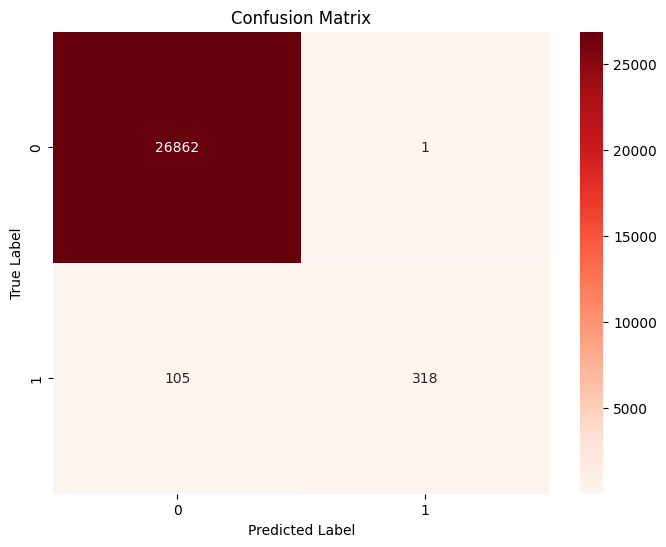

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


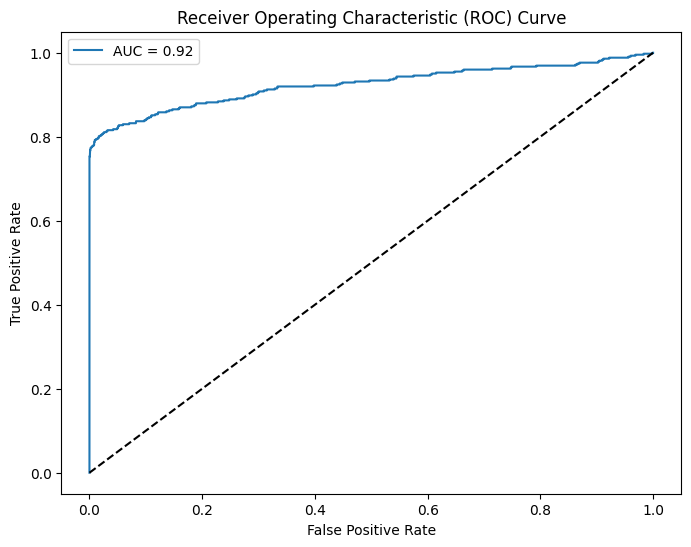

In [94]:
from sklearn.metrics import roc_curve, roc_auc_score



y_pred_prob = model.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


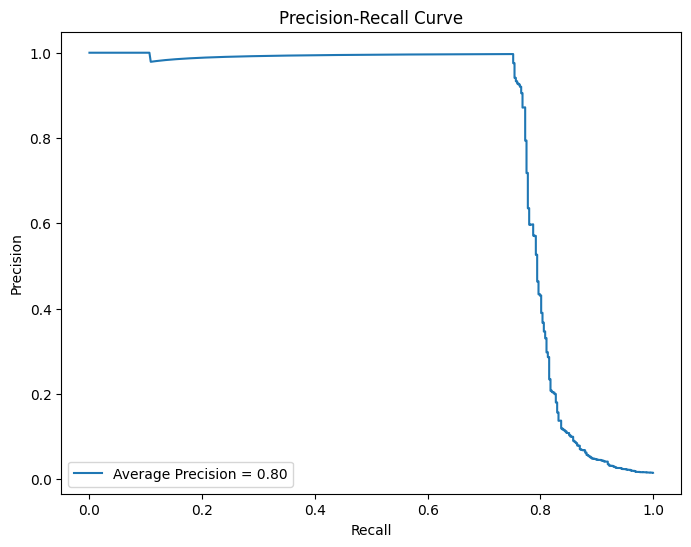

In [95]:
from sklearn.metrics import precision_recall_curve, average_precision_score


precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
avg_precision = average_precision_score(y_test, y_pred_prob)


plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Average Precision = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [96]:
accuracy_score(y_test,y_pred)



0.9961152239243568

In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26863
           1       1.00      0.75      0.86       423

    accuracy                           1.00     27286
   macro avg       1.00      0.88      0.93     27286
weighted avg       1.00      1.00      1.00     27286



In [98]:
test=pd.read_csv('/kaggle/input/playground-series-s3e17/test.csv',index_col='id')
test.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
id,,,,,,,,,,,,
136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [99]:


test=pd.concat([test,pd.get_dummies(test.Type)],axis=1)



In [100]:
test

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,H,L,M
id,,,,,,,,,,,,,,,
136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0,False,True,False
136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0,False,True,False
136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0,False,True,False
136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0,False,False,True
136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227378,L51130,L,302.3,311.4,1484,40.4,15,0,0,0,0,0,False,True,False
227379,L47783,L,297.9,309.8,1542,33.8,31,0,0,0,0,0,False,True,False
227380,L48097,L,295.6,306.2,1501,41.4,187,0,0,0,0,0,False,True,False


In [101]:
test.isnull().sum()

Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
H                          0
L                          0
M                          0
dtype: int64

In [102]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90954 entries, 136429 to 227382
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product ID               90954 non-null  object 
 1   Type                     90954 non-null  object 
 2   Air temperature [K]      90954 non-null  float64
 3   Process temperature [K]  90954 non-null  float64
 4   Rotational speed [rpm]   90954 non-null  int64  
 5   Torque [Nm]              90954 non-null  float64
 6   Tool wear [min]          90954 non-null  int64  
 7   TWF                      90954 non-null  int64  
 8   HDF                      90954 non-null  int64  
 9   PWF                      90954 non-null  int64  
 10  OSF                      90954 non-null  int64  
 11  RNF                      90954 non-null  int64  
 12  H                        90954 non-null  bool   
 13  L                        90954 non-null  bool   
 14  M                    

In [103]:
test.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
count,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.00000,90954.000000
mean,299.859493,309.939375,1520.528179,40.335191,104.293962,0.001473,0.005343,0.002353,0.00387,0.002309
std,1.857562,1.385296,139.970419,8.504683,63.871092,0.038355,0.072903,0.048449,0.06209,0.047995
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,300.000000,310.000000,1493.000000,40.500000,106.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,301.200000,310.900000,1579.000000,46.200000,158.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [104]:
X_Test=test.drop(['Product ID','Type'],axis=1)



In [105]:
test['Machine failure']=model.predict(X_Test)

In [106]:
test

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,H,L,M,Machine failure
id,,,,,,,,,,,,,,,,
136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0,False,True,False,0
136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0,False,True,False,0
136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0,False,True,False,0
136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0,False,False,True,0
136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227378,L51130,L,302.3,311.4,1484,40.4,15,0,0,0,0,0,False,True,False,0
227379,L47783,L,297.9,309.8,1542,33.8,31,0,0,0,0,0,False,True,False,0
227380,L48097,L,295.6,306.2,1501,41.4,187,0,0,0,0,0,False,True,False,0
